## Yield Curve Curvature Mean-Reverting Trading Strategie

### FINM 33150 Final Project

Hengxu Zhu, 12368409 | Yumeng Zhang, 12372205 | Siyang Qu, 12375854

In [1]:
import sys
sys.version

'3.10.8 (main, Nov 24 2022, 08:09:04) [Clang 14.0.6 ]'

In [2]:
from utils import *

## Motivating Idea

**Yield curve** is a graphical representation of the yields or interest rates of a series of fixed-income securities, such as bonds or treasury bills, with different maturities. The yield curve shows the relationship between the interest rates and the time to maturity for similar types of securities. In other words, it plots the yields of bonds with different maturities against each other. Normally, the yield curve is upward-sloping, which means that long-term bonds offer higher yields than short-term bonds. This is because long-term bonds carry a higher risk of inflation, interest rate changes, and default, and therefore require a higher yield to compensate investors for that risk. However, the shape of the yield curve can change depending on the prevailing economic conditions. For example, in times of economic uncertainty or recession, the yield curve can become inverted, which means that short-term bonds offer higher yields than long-term bonds. An inverted yield curve is often seen as a warning sign of an impending economic slowdown.

**The curvature of a yield curve** refers to the shape of the curve, which can be upward-sloping, flat, or inverted. It can provide insights into market expectations for future economic conditions and monetary policy. A steep upward-sloping curve can indicate expectations of strong economic growth and inflation, while a flat or inverted curve can indicate expectations of weaker growth or even a recession. The curvature of a yield curve can change over time as market conditions and expectations evolve. As a result, investors and analysts closely monitor the curvature of the yield curve as an important indicator of market conditions and sentiment.

Motivated from the Spread Trading Homework, our team expext the yield curve to mean-revert to an unconditional curve. Deviations in the curvature of the yield curve from historical norms are exploited to make bets on future prices. If the curvature is higher (lower) than the historical average, we bet that they’ll decrease (increase) towards the historical average. 


### Historical Evidence

Our motivation is also supported by the historical evidence that the US Treasury bonds are normally traded within tight and finite bounds. The reasons could include: 

1. Monetary policy: The Federal Reserve, the central bank of the United States, has the power to influence interest rates through its monetary policy decisions. When the Fed signals that it will keep interest rates low, it can put downward pressure on Treasury bond yields, which can cause them to trade within tight bounds.

2. Economic conditions: When the economy is growing at a steady pace and inflation is low, Treasury bond yields may trade within tight bounds because investors are less concerned about economic risks and are more willing to hold onto fixed-income investments like Treasuries.

3. Investor demand: US Treasury bonds are viewed as a safe haven investment, particularly in times of market stress. When investors become more risk-averse, they may flock to Treasury bonds, which can drive down yields and cause them to trade within tight bounds.

4. Technical factors: Technical factors such as supply and demand imbalances, trading volume, and market liquidity can also cause Treasury bond yields to trade within tight bounds.

Overall, Treasury bond yields can trade within tight bounds due to a combination of macroeconomic and technical factors.

### Theoretical Evidence

The yield curve is known to mean-revert because it reflects the market's expectations of future economic growth and inflation. When the economy is expected to grow strongly and inflation is expected to rise, long-term interest rates tend to be higher than short-term interest rates, resulting in a steep yield curve. Conversely, when the economy is expected to slow down and inflation is expected to decrease, long-term interest rates tend to be lower than short-term interest rates, resulting in a flat or inverted yield curve. As the research paper suggests, pure Expectation Hypothesis of the term structure suggests that the long-term interest rate is the average of the current and expected short-term rates, so that yield spread is mean-reverting [Fisher (1986), Lutz (1940), Meiselman (1962)].

As economic conditions change over time, market participants adjust their expectations about future growth and inflation, which in turn affects the shape of the yield curve. If expectations turn out to be overly optimistic or pessimistic, the yield curve may revert to its long-term average as market participants adjust their positions. This mean-reversion is driven by the tendency of market participants to correct for mispricing and to adjust their expectations as new information becomes available.



## Dataset

In these strategies, we are using US Treasuries yield curve rates as our dataset. The data is extracted from Quandl and the time span is from 2001 to 2023.

US Treasuries are often used in yield curve mean-reverting trading strategies because they are considered to be the benchmark for risk-free interest rates in the global financial markets. In addition, the US Treasury yield curve is closely watched by investors and economists as a barometer of economic growth and inflation expectations. As a result, changes in the shape of the yield curve can provide valuable information about the state of the economy and the future path of interest rates. US Treasuries are highly liquid, transparent, and have a wide range of maturities, which allows investors to take positions across the entire yield curve.

In [3]:
df_yc_m = get_yield_curve()
df_yc_m.head()

,1m,2m,3m,6m,1y,2y,3y,5y,7y,10y,20y
Date,,,,,,,,,,,
2001-08-31,3.40,3.385,3.37,3.31,3.41,3.64,3.91,4.46,4.72,4.85,5.47
2001-09-30,2.28,2.340,2.40,2.36,2.49,2.86,3.22,3.93,4.37,4.60,5.45
2001-10-31,2.15,2.100,2.05,1.95,2.07,2.44,2.87,3.66,4.03,4.30,5.05
2001-11-30,1.87,1.825,1.78,1.79,2.06,2.84,3.30,4.08,4.55,4.78,5.54
2001-12-31,1.68,1.710,1.74,1.83,2.17,3.07,3.59,4.38,4.84,5.07,5.74


In [4]:
df_yc_m

,1m,2m,3m,6m,1y,2y,3y,5y,7y,10y,20y
Date,,,,,,,,,,,
2001-08-31,3.40,3.385,3.37,3.31,3.41,3.64,3.91,4.46,4.72,4.85,5.47
2001-09-30,2.28,2.340,2.40,2.36,2.49,2.86,3.22,3.93,4.37,4.60,5.45
2001-10-31,2.15,2.100,2.05,1.95,2.07,2.44,2.87,3.66,4.03,4.30,5.05
2001-11-30,1.87,1.825,1.78,1.79,2.06,2.84,3.30,4.08,4.55,4.78,5.54
2001-12-31,1.68,1.710,1.74,1.83,2.17,3.07,3.59,4.38,4.84,5.07,5.74
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,0.17,0.350,0.52,1.06,1.63,2.28,2.45,2.42,2.40,2.32,2.59
2022-04-30,0.37,0.730,0.85,1.41,2.10,2.70,2.87,2.92,2.94,2.89,3.14
2022-05-31,0.73,0.890,1.16,1.64,2.08,2.53,2.71,2.81,2.87,2.85,3.28


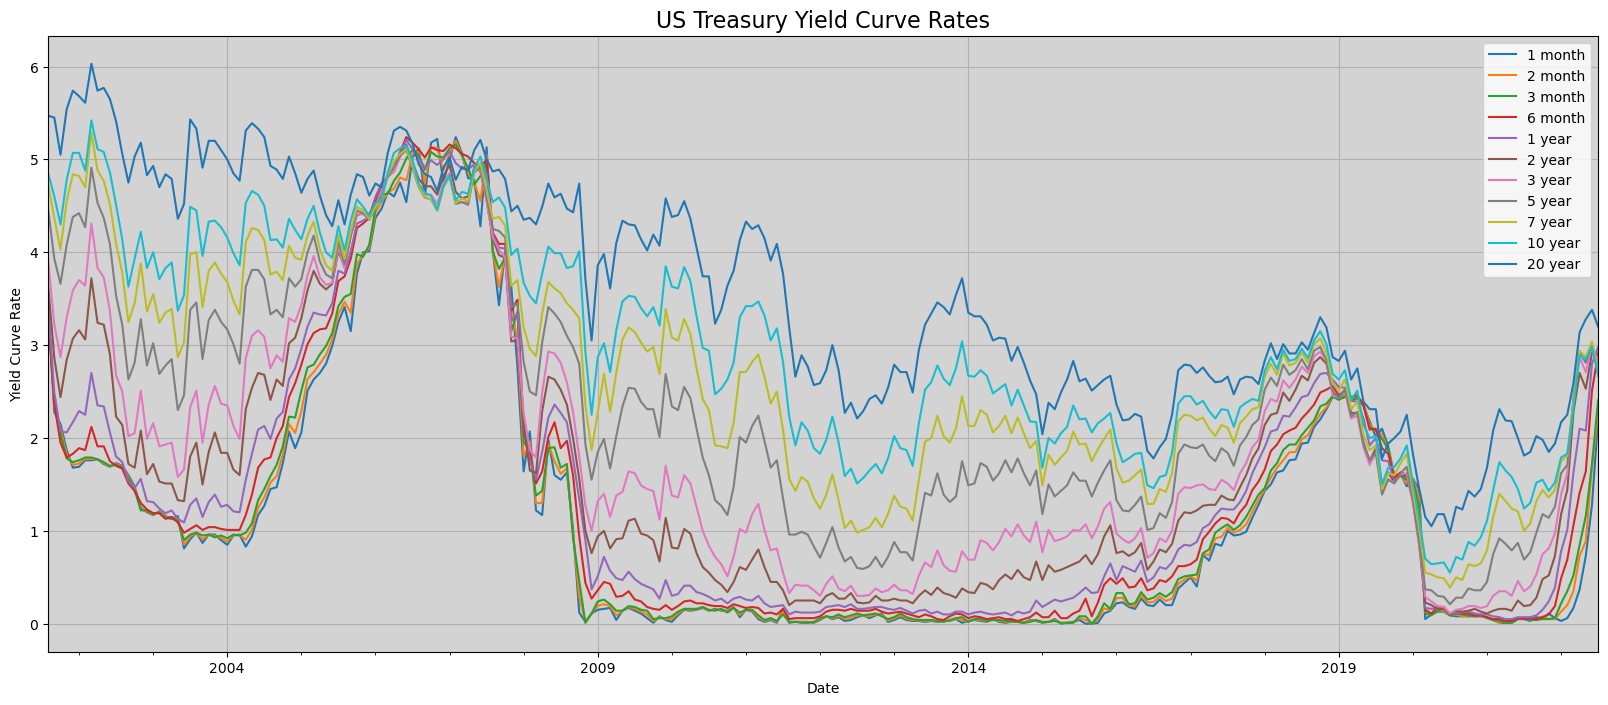

In [5]:
plot_yield_curve(df_yc_m)

From the Carry Trade Homework, we learnt that the spot rates are not directly applicable as discounting factors because they reflect the yields on coupon-bearing bonds. To convert spot rates to zero coupon rates, we needs to take into account the cash flows associated with coupon payments. Therefore, our team utilized the method introduced in class to do the **zero coupon rate** calculation and yield curve interpolation. 

Once the zero coupon rates are obtained, they can be used as discount factors for pricing financial instruments, which in our case, the US Treasury Bonds. 

In [6]:
df_zero = compute_zero_coupon(df_yc_m)
df_zero.head()

,1m_0,2m_0,3m_0,6m_0,1y_0,2y_0,3y_0,5y_0,7y_0,10y_0,20y_0
Date,,,,,,,,,,,
2001-08-31,3.40,3.385,3.37,3.31,3.41,3.639807,3.909812,4.460031,4.720498,4.850970,5.512101
2001-09-30,2.28,2.340,2.40,2.36,2.49,2.859924,3.219941,3.930495,4.371418,4.603021,5.515785
2001-10-31,2.15,2.100,2.05,1.95,2.07,2.439957,2.869981,3.660632,4.031227,4.302993,5.101017
2001-11-30,1.87,1.825,1.78,1.79,2.06,2.839964,3.299996,4.080791,4.551852,4.783659,5.602486
2001-12-31,1.68,1.710,1.74,1.83,2.17,3.069962,3.590006,4.380931,4.842047,5.074012,5.799525


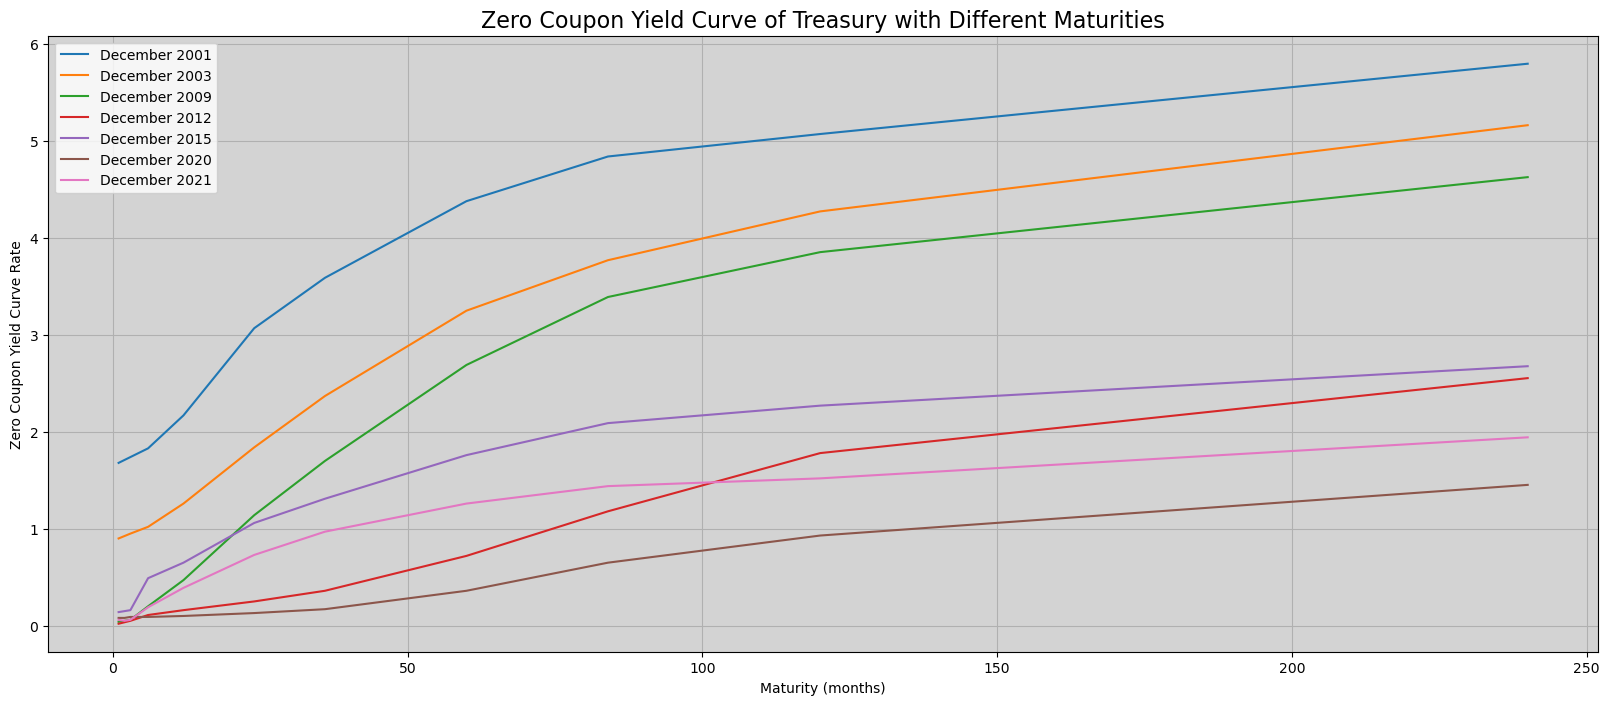

In [7]:
plot_zero_coupon_comparison(df_zero)

In [8]:
df_bond_price = calculate_bond_price(df_zero, df_yc_m,tenor=20)
df_bond_price

,old_bond_price,new_bond_price
Date,,
2001-09-30,0.890777,0.838088
2001-10-31,0.833860,0.846026
2001-11-30,0.842052,0.845807
2001-12-31,0.841528,0.859484
2002-01-31,0.855059,0.869286
...,...,...
2022-03-31,0.918299,0.978560
2022-04-30,0.976170,0.972695
2022-05-31,0.969916,0.940467


In [9]:
df_fed_fund_rate = get_fed_fund_rate()
df_fed_fund_rate 

,ffr
Date,
2001-08-31,0.008000
2001-09-30,0.007263
2001-10-31,0.007190
2001-11-30,0.006701
2001-12-31,0.006258
...,...
2022-03-31,0.005275
2022-04-30,0.005275
2022-05-31,0.005689


Referring to the academic paper, we assumed that the individual trading period is one month and that means we are holding each trade for a month. It would make more sense that we calculate the **one-month forward yield** to compare with the historical average or in specific, the unconditional curve. 

The unconditional curve will be explained and computed in the next section before clarifying our strategy. 

In [10]:
df_forward = compute_forward_yield(df_zero)
df_forward.head()

,1m_f,2m_f,3m_f,6m_f,1y_f,2y_f,3y_f,5y_f,7y_f,10y_f,20y_f
Date,,,,,,,,,,,
2001-08-31,3.40,3.37,3.355,3.292,3.410909,3.650233,3.924378,4.477998,4.736407,4.863163,5.520938
2001-09-30,2.28,2.40,2.460,2.376,2.509091,2.885138,3.246797,3.958469,4.396616,4.622543,5.529324
2001-10-31,2.15,2.05,2.000,1.910,2.062727,2.452563,2.890551,3.686235,4.053892,4.321086,5.113364
2001-11-30,1.87,1.78,1.735,1.774,2.077273,2.882137,3.340853,4.118263,4.584164,4.808143,5.618104
2001-12-31,1.68,1.74,1.770,1.860,2.214545,3.130395,3.644578,4.426709,4.880144,5.102533,5.816761


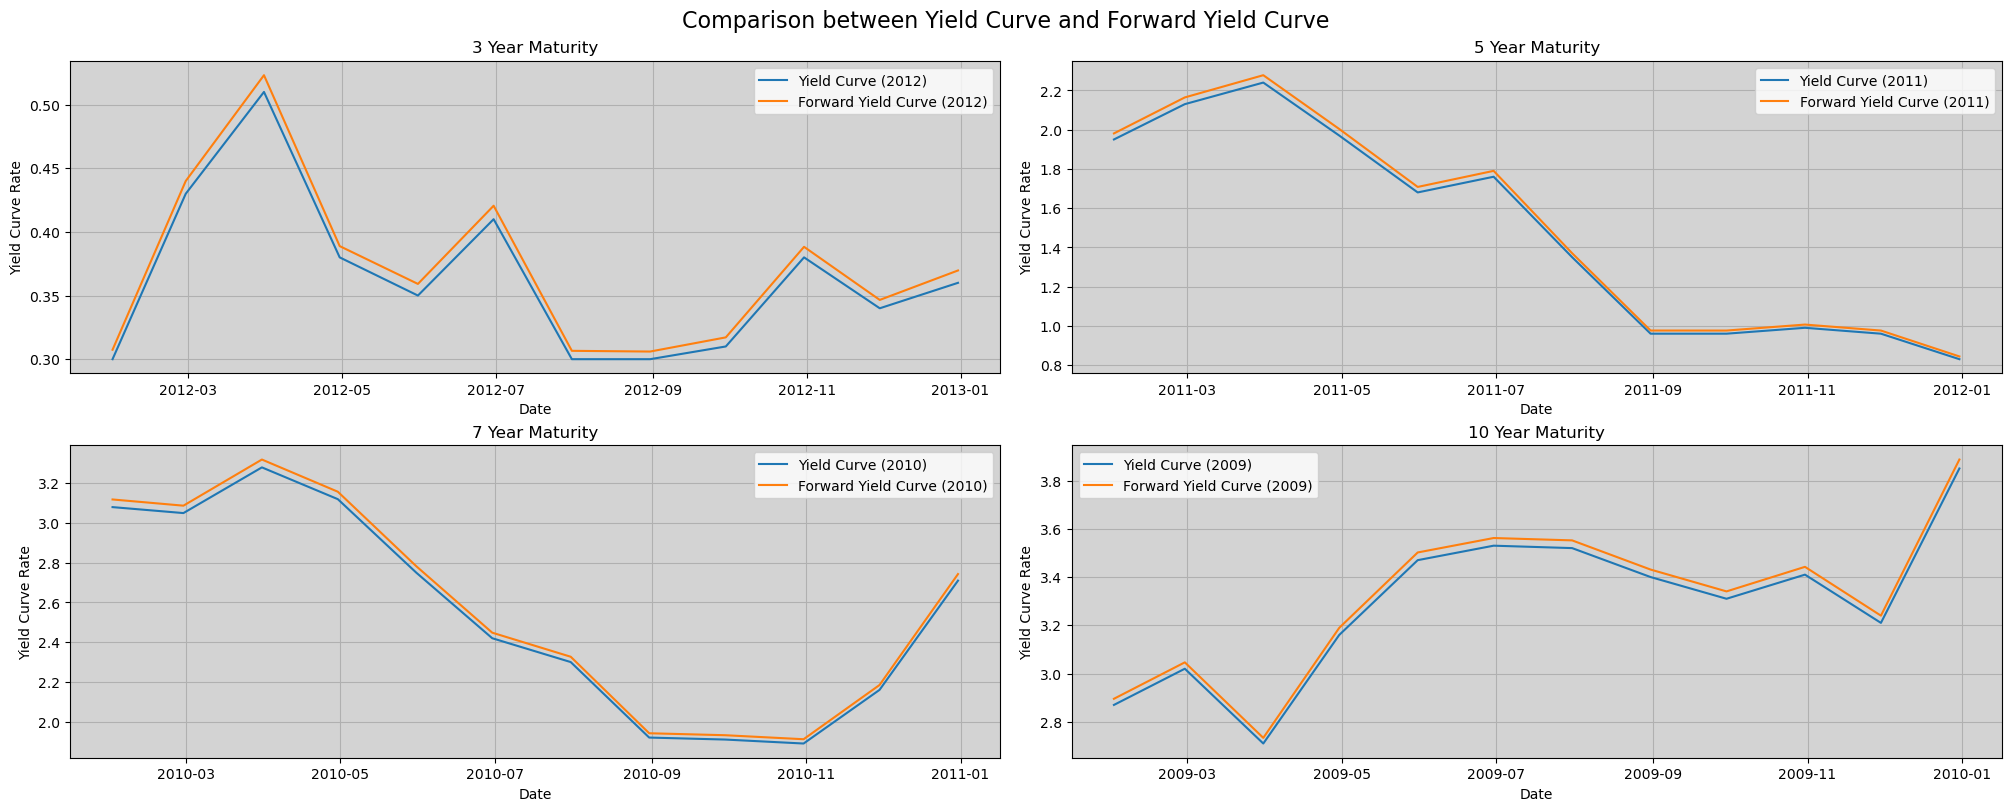

In [11]:
plot_forward_yield_comparison(df_yc_m,df_forward)

## Unconditional Yield Curve

Unconditional Yield Curve works as a trigger in our trading strategy. It determines the long-short action for each investment period.

Three different methods are used to calculate the unconditional curve so that we can compare to extract the best strategy.

* Historical Average: The simple arithmetic average of all historical yields.

* Moving Boxcar Average: The simple arithmetic average of the yields for a specific recent periods.

* Historical Exponential Weighting Average: Utilized Exponentially decaying method to calculate the average of all available historical yields.

These methods are motivated from the Predictive Regression homework.

In [12]:
df_uncon_average = unconditional_average(df_zero)
df_uncon_boxcar = unconditional_boxcar(df_zero, window = 10)
df_uncon_exp_decay = unconditional_exponential_decay(df_zero, decay_coefficient = 0.1)
df_uncon_exp_decay2 = unconditional_exponential_decay(df_zero, decay_coefficient = 0.1, window = 20)

In [13]:
df_uncon_average

,1m_0,2m_0,3m_0,6m_0,1y_0,2y_0,3y_0,5y_0,7y_0,10y_0,20y_0
Date,,,,,,,,,,,
2002-08-31,1.938462,1.941923,1.945385,2.004615,2.286923,2.963020,3.433826,4.142946,4.567692,4.824224,5.613373
2002-09-30,1.914286,1.916429,1.918571,1.969286,2.232857,2.874232,3.332838,4.034896,4.473655,4.739156,5.556664
2002-10-31,1.885333,1.886000,1.886667,1.933333,2.181333,2.794615,3.247315,3.953264,4.405510,4.685521,5.526884
2002-11-30,1.845625,1.845313,1.845000,1.893750,2.142500,2.749951,3.201233,3.911221,4.372776,4.656690,5.509718
2002-12-31,1.807647,1.807941,1.808235,1.854706,2.094118,2.682894,3.129984,3.844705,4.313280,4.608312,5.473694
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,1.170847,1.198407,1.224637,1.328992,1.433347,1.657265,1.879444,2.325971,2.682257,2.995755,3.570800
2022-04-30,1.167631,1.196526,1.223133,1.329317,1.436024,1.661453,1.883422,2.328355,2.683291,2.995328,3.569081
2022-05-31,1.165880,1.195300,1.222880,1.330560,1.438600,1.664927,1.886728,2.330281,2.684038,2.994745,3.567958


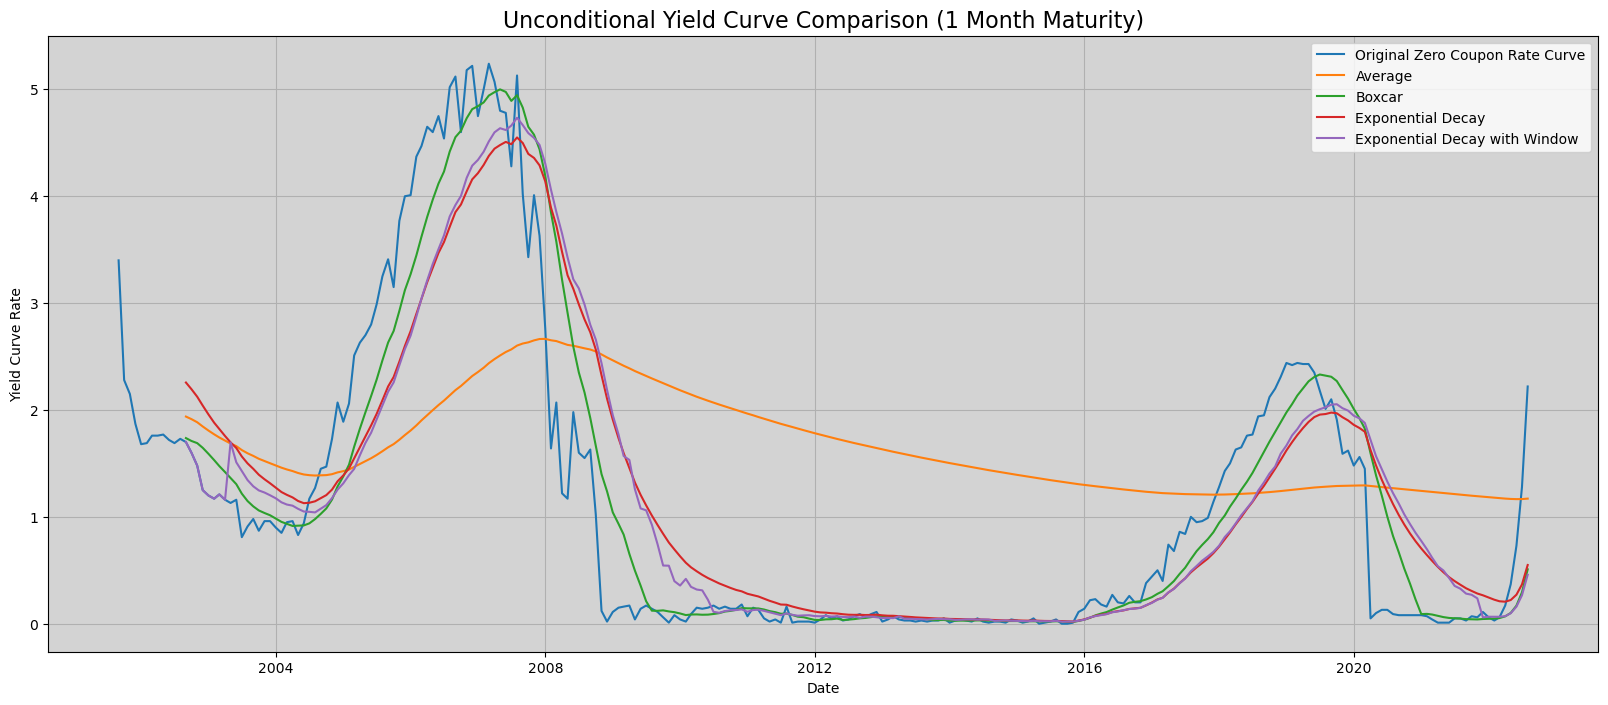

In [14]:
plot_unconditional_yc_comparision(df_zero, df_uncon_average, df_uncon_boxcar, df_uncon_exp_decay, df_uncon_exp_decay2, rate = 'z')

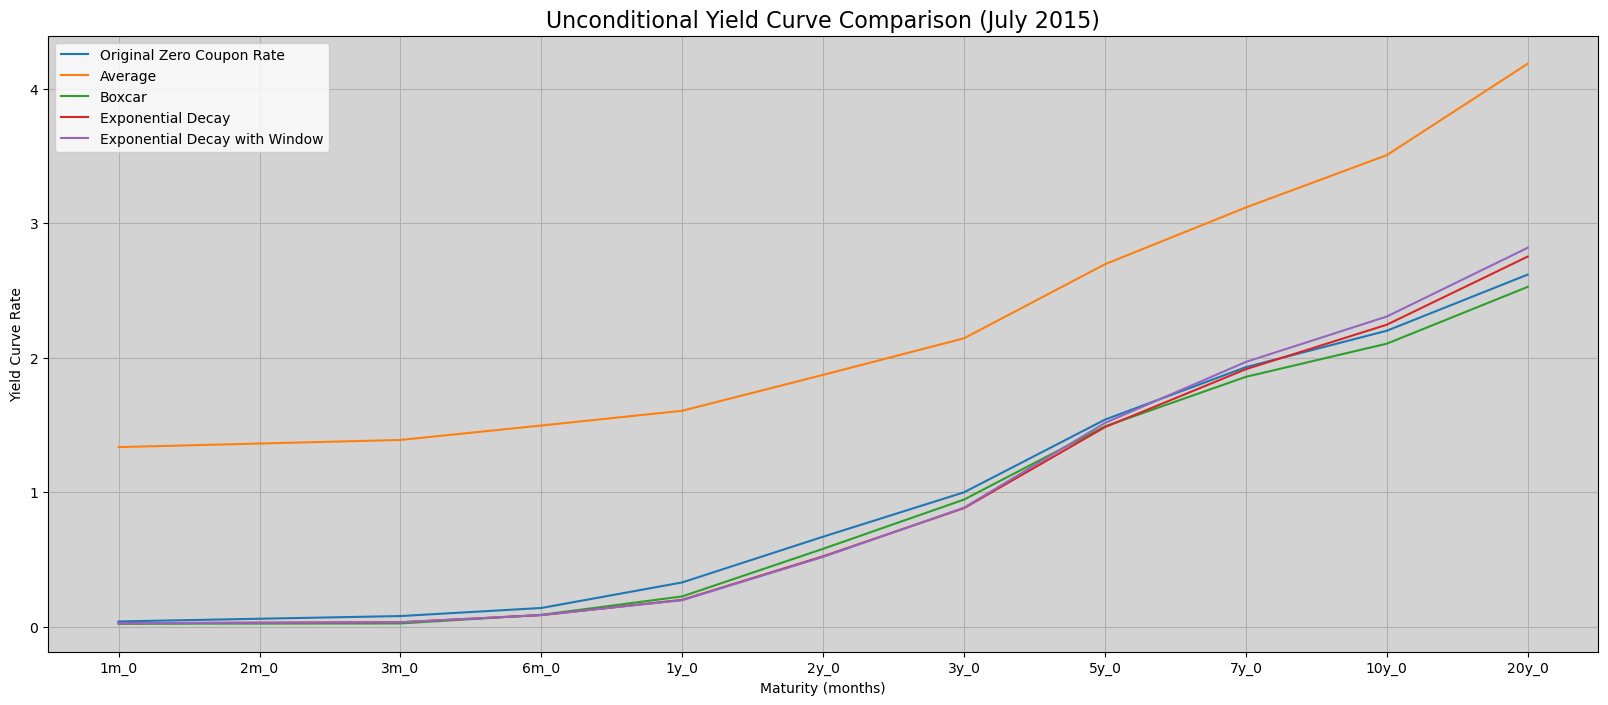

In [15]:
plot_unconditional_yc_comparision2(df_zero, df_uncon_average, df_uncon_boxcar, df_uncon_exp_decay, df_uncon_exp_decay2, rate = 'z')

While our team arranging the unconditional yield curve using the method from the research paper, we found that they are not always effective. For example, referring to the graph above, you may see that the simple historical average is apart from all other calculations. Actually, this is the reason we attempted three different methods to compute this curve to draw the best trading results.

## Strategies

#### Barbell Strategy (Bets on the curvatures)

- Invest in two ends of the yield and shorting the middle (or vice versa). 

- Curvature for the whole curve mean-reverts.

- Curvature for 3 adjacent bonds mean-reverts.

The overarching strategies allow us to identify deviations from expectation at any given point in time and construct long/short trades based on the mean-reversion assumption.

For example, if curvature for 3 adjacent bonds mean-reverts is smaller than that of the unconditional curve,  then we long the front and back bond and short the other. These strategies can be improved or refined by using other market indicators to associate the belief that deviations will mean-revert with a confidence score. This confidence score could be based on market volatility etc. We can then adjust trade size based on the confidence score.

In [16]:
# df_curvature = three_bond_curvature(df_forward, df_uncon_boxcar, ['3m','6m','1y'], bound = 0.25, rate='f')
df_curvature = three_bond_curvature(df_zero, df_uncon_boxcar, ['3m','6m','1y'], bound = 0.25, rate='z')
df_curvature.head()

,3m_0,6m_0,1y_0,origin_curvature,uncon_curvature,upper,lower
Date,,,,,,,
2002-08-31,1.69,1.67,1.74,-0.22,-0.276,-0.239,-0.313
2002-09-30,1.57,1.51,1.53,-0.28,-0.254,-0.217,-0.291
2002-10-31,1.44,1.43,1.46,-0.10,-0.232,-0.195,-0.269
2002-11-30,1.22,1.30,1.56,-0.20,-0.224,-0.187,-0.261
2002-12-31,1.22,1.23,1.32,-0.14,-0.194,-0.157,-0.231


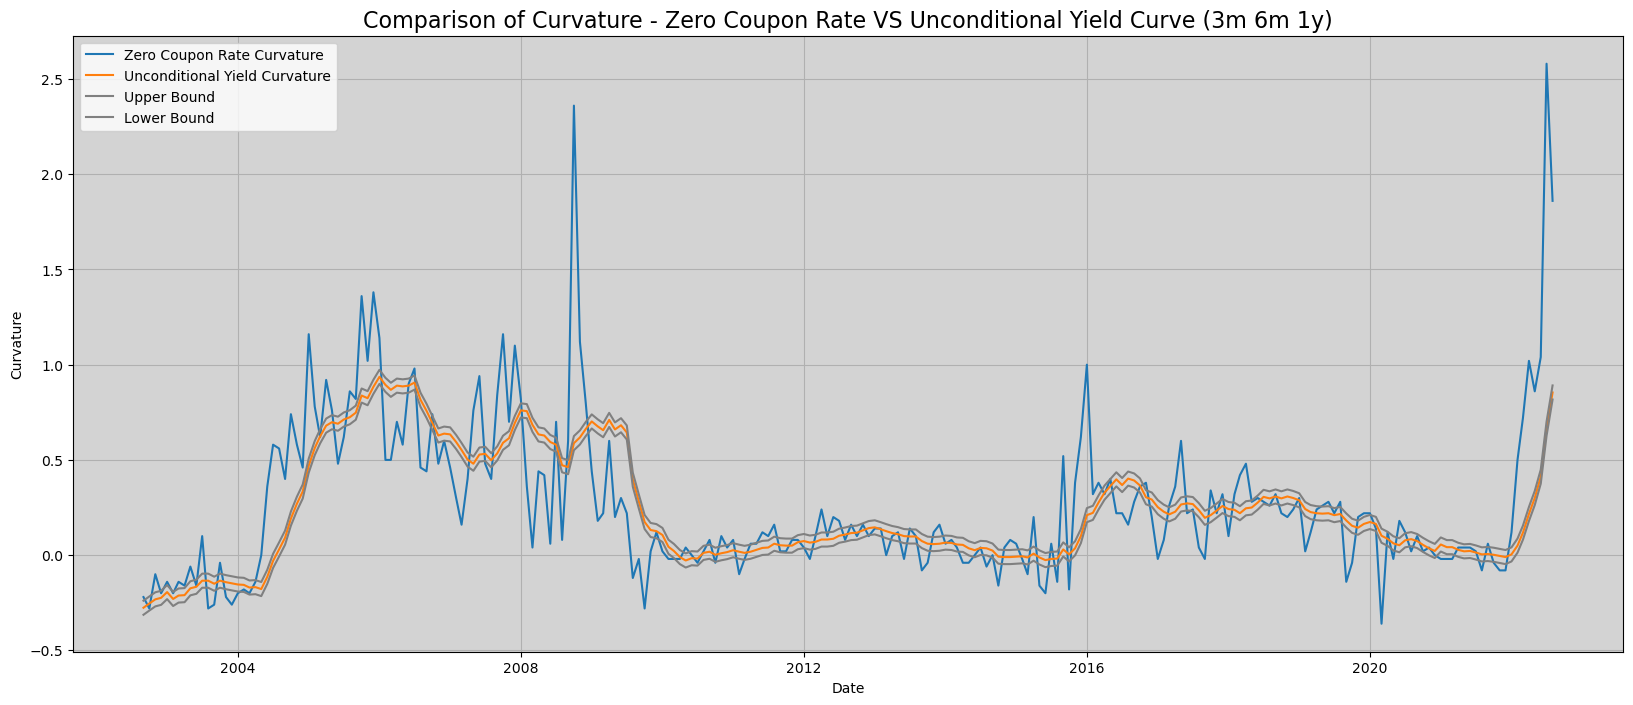

In [17]:
plot_curvature(df_curvature, '3m 6m 1y',rate='z',bound=True)

### 1 year + 5 year + 20 year

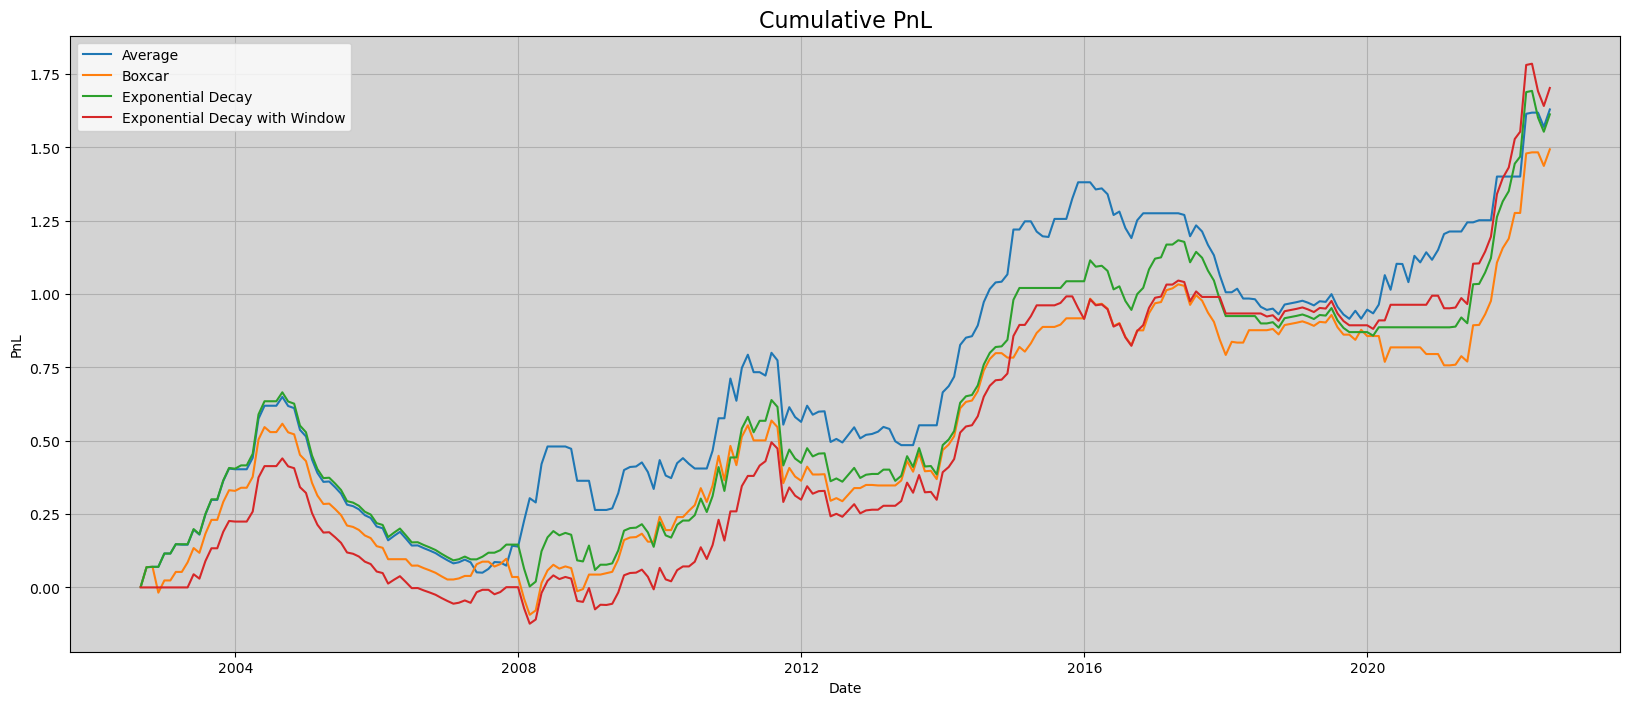

In [19]:
combination = ['1y','5y','20y']
bound = 0.2

df_curvature1 = trade(df_zero, df_uncon_average, df_yc_m, df_fed_fund_rate, combination, bound = bound)
df_curvature2 = trade(df_zero, df_uncon_boxcar, df_yc_m, df_fed_fund_rate, combination, bound = bound)
df_curvature3 = trade(df_zero, df_uncon_exp_decay, df_yc_m, df_fed_fund_rate, combination, bound = bound)
df_curvature4 = trade(df_zero, df_uncon_exp_decay2, df_yc_m, df_fed_fund_rate, combination, bound = bound)

plt.figure(figsize=(20, 8))

# plt.plot(df_curvature1['cumulative_pnl'], label = "Average")
# plt.plot(df_curvature2['cumulative_pnl'], label = "Boxcar")
# plt.plot(df_curvature3['cumulative_pnl'], label = "Exponential Decay")
# plt.plot(df_curvature4['cumulative_pnl'], label = "Exponential Decay with Window") 

plt.plot(df_curvature1['cum_return'], label = "Average")
plt.plot(df_curvature2['cum_return'], label = "Boxcar")
plt.plot(df_curvature3['cum_return'], label = "Exponential Decay")
plt.plot(df_curvature4['cum_return'], label = "Exponential Decay with Window")

plt.title('Cumulative PnL', fontsize=16)
plt.ylabel('PnL')
plt.xlabel('Date')
plt.legend()
plt.gca().set_facecolor('lightgray')
plt.grid(True)

plt.show();

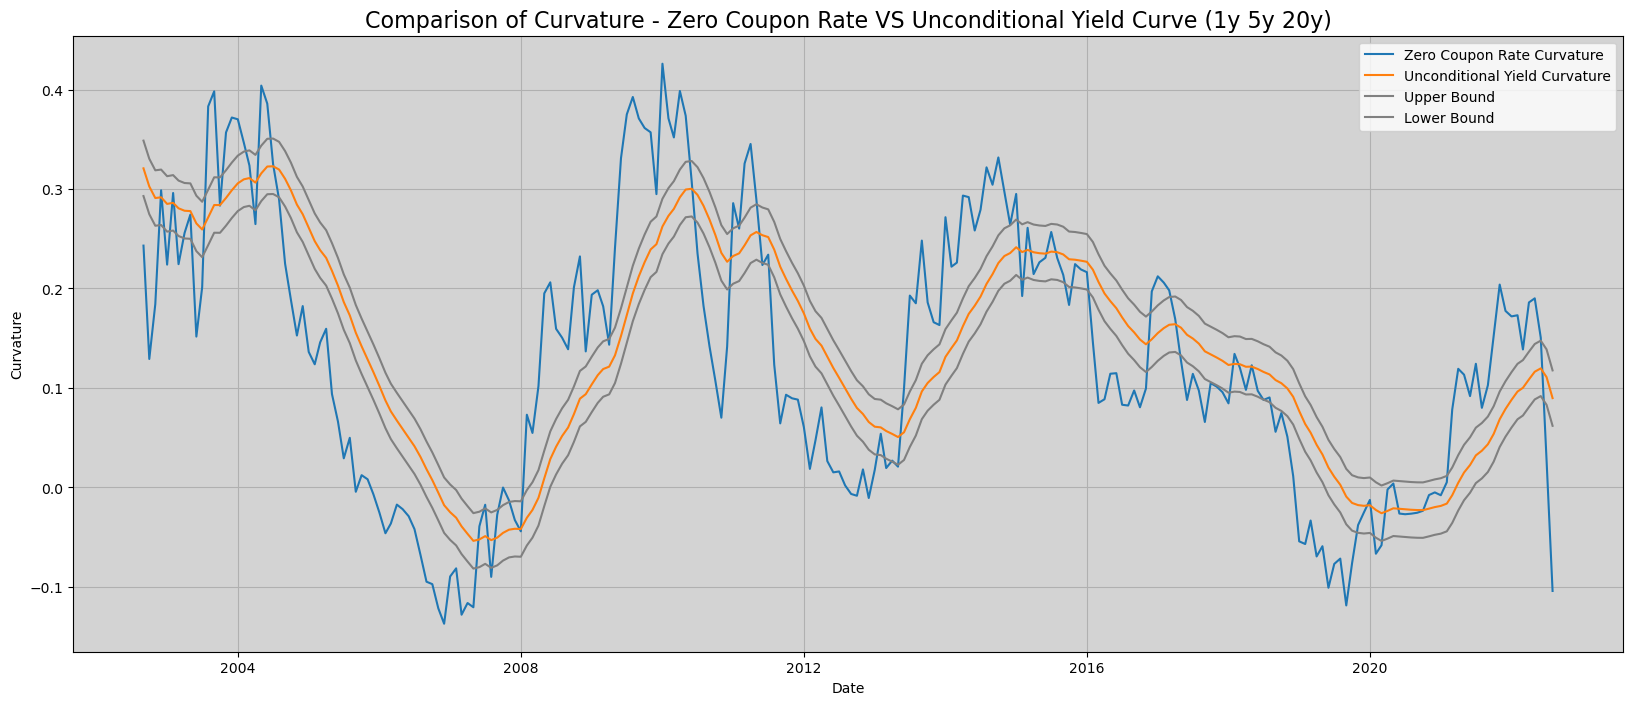

In [22]:
plot_curvature(df_curvature3, '1y 5y 20y',rate='z',bound = True)

## Analysis

* Benchmark: One common US bond index, S&P index

* Tune hyperparameters associated with trade sizes on a period of training set and report out-of-sample performance (sharpe, return, volatility, drawdown etc) on the test set.

* Test performance after accounting for transaction/trading cost.

* PnL attribution on both training and test set to understand the relationship between individual strategies.

In [25]:
performance_metrics(df_curvature1,'Average')

,Mean,Vol,Sharpe,Min,Max,Max Drawdown
Average,0.053316,0.099458,0.535897,-0.123568,0.101526,-0.599391
